# Imports

In [1]:
# Import Libraries
import requests
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.support.ui import WebDriverWait

from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

import datetime

import pandas as pd
import numpy as np

# Sentiment Analysis

## Data Preprocessing

In [19]:
df = pd.read_csv('flightglobal_cleaned.csv')
df = df[df['Article'].notna()]
df['Month'] = pd.DatetimeIndex(df['Date']).month


print(df.shape)
df.head()

(2389, 7)


,Unnamed: 0,PageLink,Title,Article,Date,Topic,Month
0,1,https://www.flightglobal.com/fleets/tap-to-cut...,TAP to cut more aircraft as losses mount,TAP Air Portugal has disclosed plans to furthe...,30-Jun-20,"Coronavirus, Europe, Fleets, Networks",6
1,2,https://www.flightglobal.com/aerospace/europea...,European Aviation responds to pandemic with pl...,"For most of the aviation sector, the coronavir...",30-Jun-20,Aerospace,6
2,3,https://www.flightglobal.com/airlines/easyjet-...,EasyJet proposes UK base closures including tw...,UK budget carrier EasyJet is proposing to clos...,30-Jun-20,"Air Transport, EasyJet, Europe",6
3,4,https://www.flightglobal.com/airlines/easyjets...,EasyJet's agreement with Stelios ends as his s...,EasyJet's relationship agreement with founder ...,30-Jun-20,"Airlines, Europe",6
4,5,https://www.flightglobal.com/business-aviation...,Gulfstream G280 hits 200th-delivery milestone,Gulfstream delivered the 200th G280 in late Ju...,30-Jun-20,Business Jets,6


In [3]:
df2 = df[['PageLink','Title','Article','Month','Topic']]

#tokenize
df2['sent'] = df['Article'].apply(word_tokenize)  


#lowercase
def lower(row):
    lower = [w.lower() for w in row['sent']]
    return lower

df2['sent'] = df2.apply(lower,axis=1)

df2.head()

C:\Users\Wong Jia Wei\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Wong Jia Wei\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,PageLink,Title,Article,Month,Topic,sent
0,https://www.flightglobal.com/fleets/tap-to-cut...,TAP to cut more aircraft as losses mount,TAP Air Portugal has disclosed plans to furthe...,6,"Coronavirus, Europe, Fleets, Networks","[tap, air, portugal, has, disclosed, plans, to..."
1,https://www.flightglobal.com/aerospace/europea...,European Aviation responds to pandemic with pl...,"For most of the aviation sector, the coronavir...",6,Aerospace,"[for, most, of, the, aviation, sector, ,, the,..."
2,https://www.flightglobal.com/airlines/easyjet-...,EasyJet proposes UK base closures including tw...,UK budget carrier EasyJet is proposing to clos...,6,"Air Transport, EasyJet, Europe","[uk, budget, carrier, easyjet, is, proposing, ..."
3,https://www.flightglobal.com/airlines/easyjets...,EasyJet's agreement with Stelios ends as his s...,EasyJet's relationship agreement with founder ...,6,"Airlines, Europe","[easyjet, 's, relationship, agreement, with, f..."
4,https://www.flightglobal.com/business-aviation...,Gulfstream G280 hits 200th-delivery milestone,Gulfstream delivered the 200th G280 in late Ju...,6,Business Jets,"[gulfstream, delivered, the, 200th, g280, in, ..."


In [4]:
#POS Tagging
#Mapping of NLTK’s POS tags to the format wordnet lemmatizer would accept. 
#The get_wordnet_pos() function defined below does this mapping job.

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
#     print(tag)
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
#     print(tag_dict)
    return tag_dict.get(tag, wordnet.NOUN)


#Lemmatization with WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(row):
    lem = ([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in row['sent']])
    return lem


df2['lem'] = df2.apply(lemma,axis =1)
df2.head()


,PageLink,Title,Article,Month,Topic,sent,lem
0,https://www.flightglobal.com/fleets/tap-to-cut...,TAP to cut more aircraft as losses mount,TAP Air Portugal has disclosed plans to furthe...,6,"Coronavirus, Europe, Fleets, Networks","[tap, air, portugal, has, disclosed, plans, to...","[tap, air, portugal, have, disclose, plan, to,..."
1,https://www.flightglobal.com/aerospace/europea...,European Aviation responds to pandemic with pl...,"For most of the aviation sector, the coronavir...",6,Aerospace,"[for, most, of, the, aviation, sector, ,, the,...","[for, most, of, the, aviation, sector, ,, the,..."
2,https://www.flightglobal.com/airlines/easyjet-...,EasyJet proposes UK base closures including tw...,UK budget carrier EasyJet is proposing to clos...,6,"Air Transport, EasyJet, Europe","[uk, budget, carrier, easyjet, is, proposing, ...","[uk, budget, carrier, easyjet, be, propose, to..."
3,https://www.flightglobal.com/airlines/easyjets...,EasyJet's agreement with Stelios ends as his s...,EasyJet's relationship agreement with founder ...,6,"Airlines, Europe","[easyjet, 's, relationship, agreement, with, f...","[easyjet, 's, relationship, agreement, with, f..."
4,https://www.flightglobal.com/business-aviation...,Gulfstream G280 hits 200th-delivery milestone,Gulfstream delivered the 200th G280 in late Ju...,6,Business Jets,"[gulfstream, delivered, the, 200th, g280, in, ...","[gulfstream, deliver, the, 200th, g280, in, la..."


## Load Positive and Negative Lexicons

In [5]:
pos_lexicon = './positive-words.txt'#'positive-words.txt'
neg_lexicon = './negative-words.txt' #negative-words.txt'


# Read the positive sentiment lexicon.
pos_dict = {}
f = open(pos_lexicon, 'r', encoding = "ISO-8859-1")
for line in f:
    line = line.strip()
    pos_dict[line] = 1
f.close()

# Read the negative sentiment lexicon.
neg_dict = {}
f = open(neg_lexicon, 'r', encoding = "ISO-8859-1")
for line in f:
    line = line.strip()
    neg_dict[line] = 1
f.close()

## Scoring and Sentiment Labeling

In [37]:
def f(row):
    score = 0
    for word in row['lem']:
    
# If the word w is inside the positive lexicon, then increase the score by 1.
        if word in pos_dict:
            score = score + 1

# If the word w is inside the negative lexicon, then decrease the score by 1.

        elif word in neg_dict:
            score = score - 1

    return score


def f1(row):
    if row['score'] > 0:
        sentiment = 'positive'
        
    elif row['score'] <0:
        sentiment = 'negative'
        
    else:
        sentiment = 'neutral'
    
    
    return sentiment

df2['score'] = df2.apply(f, axis=1)
df2['sentiment_lexicon'] = df2.apply(f1, axis=1)
# df2 = df2[df2['sentiment_lexicon']]
df2

,PageLink,Title,Article,Month,Topic,sent,lem,score,sentiment_lexicon
0,https://www.flightglobal.com/fleets/tap-to-cut...,TAP to cut more aircraft as losses mount,TAP Air Portugal has disclosed plans to furthe...,6,"Coronavirus, Europe, Fleets, Networks","[tap, air, portugal, has, disclosed, plans, to...","[tap, air, portugal, have, disclose, plan, to,...",4,positive
1,https://www.flightglobal.com/aerospace/europea...,European Aviation responds to pandemic with pl...,"For most of the aviation sector, the coronavir...",6,Aerospace,"[for, most, of, the, aviation, sector, ,, the,...","[for, most, of, the, aviation, sector, ,, the,...",4,positive
2,https://www.flightglobal.com/airlines/easyjet-...,EasyJet proposes UK base closures including tw...,UK budget carrier EasyJet is proposing to clos...,6,"Air Transport, EasyJet, Europe","[uk, budget, carrier, easyjet, is, proposing, ...","[uk, budget, carrier, easyjet, be, propose, to...",-1,negative
3,https://www.flightglobal.com/airlines/easyjets...,EasyJet's agreement with Stelios ends as his s...,EasyJet's relationship agreement with founder ...,6,"Airlines, Europe","[easyjet, 's, relationship, agreement, with, f...","[easyjet, 's, relationship, agreement, with, f...",-2,negative
4,https://www.flightglobal.com/business-aviation...,Gulfstream G280 hits 200th-delivery milestone,Gulfstream delivered the 200th G280 in late Ju...,6,Business Jets,"[gulfstream, delivered, the, 200th, g280, in, ...","[gulfstream, deliver, the, 200th, g280, in, la...",1,positive
...,...,...,...,...,...,...,...,...,...
2384,https://www.flightglobal.com/airlines/iata-see...,IATA sees strong response to airline gender di...,IATA is pointing to a strong response from air...,1,Airlines,"[iata, is, pointing, to, a, strong, response, ...","[iata, be, point, to, a, strong, response, fro...",16,positive
2385,https://www.flightglobal.com/business-aviation...,Airbus Corporate Helicopters and Aston Martin ...,Airbus Corporate Helicopters (ACH) is partneri...,1,"Aerospace, Business & General Aviation, Europe...","[airbus, corporate, helicopters, (, ach, ), is...","[airbus, corporate, helicopter, (, ach, ), be,...",18,positive
2386,https://www.flightglobal.com/news/wake-separat...,Wake separation adequate before Bek Fokker 100...,Kazakhstan's air navigation service is rejecti...,1,"Air Transport, Asia Pacific, Safety","[kazakhstan, 's, air, navigation, service, is,...","[kazakhstan, 's, air, navigation, service, be,...",-6,negative
2387,https://www.flightglobal.com/military-uavs/ind...,Indonesia rolls out indigenous MALE UAV,Indonesian Aerospace has rolled out the first ...,1,"Asia Pacific, Military UAVs","[indonesian, aerospace, has, rolled, out, the,...","[indonesian, aerospace, have, roll, out, the, ...",-1,negative


## Breakdown of Results

In [7]:
#Find proportion of sentiments
df2['sentiment_lexicon'].value_counts(normalize = True)

positive    0.555044
negative    0.367518
neutral     0.077438
Name: sentiment_lexicon, dtype: float64

In [8]:
#See sentiments by month
pd.crosstab(df2.Month, df2.sentiment_lexicon,  margins=True)

sentiment_lexicon,negative,neutral,positive,All
Month,,,,
1,127,21,204,352
2,145,29,242,416
3,219,39,236,494
4,151,31,206,388
5,117,39,204,360
6,119,26,234,379
All,878,185,1326,2389


In [9]:
#proportion of sentiments by month
pd.crosstab(df2.Month, df2.sentiment_lexicon).apply(lambda r: round(r/r.sum(),2), axis=1)

sentiment_lexicon,negative,neutral,positive
Month,,,
1,0.36,0.06,0.58
2,0.35,0.07,0.58
3,0.44,0.08,0.48
4,0.39,0.08,0.53
5,0.32,0.11,0.57
6,0.31,0.07,0.62


In [38]:
df2=df2.reset_index(drop=True)
df2.to_csv('./Topic Analysis/Final/data/Sentiment Lexicon with Lemmatization.csv',index=False)

# Topic Modelling

### Reading the output from sentiment scores

In [39]:
flightglobal = pd.read_csv("./Topic Analysis/Final/data/Sentiment Lexicon with Lemmatization.csv")

# Remove irrelevant columns
# flightglobal['Article'] = flightglobal['Article'].fillna("")
flightglobal_neg = flightglobal.loc[flightglobal.sentiment_lexicon=='negative', 'Article']
flightglobal_pos = flightglobal.loc[flightglobal.sentiment_lexicon=='positive', 'Article']
print(flightglobal_neg.head())
print(flightglobal_pos.head())

2     UK budget carrier EasyJet is proposing to clos...
3     EasyJet's relationship agreement with founder ...
15    Norwegian has cancelled orders for 97 Boeing a...
21    Canada's Porter Airlines will restart its oper...
22    The coronavirus crisis will reduce the overall...
Name: Article, dtype: object
0    TAP Air Portugal has disclosed plans to furthe...
1    For most of the aviation sector, the coronavir...
4    Gulfstream delivered the 200th G280 in late Ju...
5    A bilateral effort to equip in-service Eurofig...
6    The first Airbus Defence & Space A330 multi-ro...
Name: Article, dtype: object


### Data Preprocessing

In [12]:
# Create list of stop words
stop_list = nltk.corpus.stopwords.words('english')
stop_list += ['air', 'aircraft', 'airlines', 'airline', 'flight', 'flights', 'aviation', 'aerospace', 
              'million', 'billion', 'says', 'said', 'also', 'show', 'would', 'new', 'first', 'year', 'max',  
              'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten',
              'including', 'us', 'china', 'boeing', 'airbus',
              'could', 'time', 'states', 'company', 'cirium', 'adds', 'last', 'group']

# Lemmatization with POS Tag
from nltk.stem.wordnet import WordNetLemmatizer

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()

# Pre-processing of Corpus
import re
from nltk.corpus import wordnet

def corpus2article(corpus):
    article1 = []
    for row in corpus:
        article = nltk.word_tokenize(row) # tokenisation
        article1.append(article)
    article2 = [[w.lower() for w in article] for article in article1] # change to lower case 
    article3 = [[w.replace('covid-19', 'coronavirus') for w in article] for article in article2] # standardise COVID term
    article4 = [[w.replace('-', '') for w in article] for article in article3] # replace hyphens
    article5 = [[w for w in article if re.search('^[a-z]+$', w)] for article in article4] # remove punctuations
    article6 = [[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in article] for article in article5] # lemmatization
    article7 = [[w for w in article if w not in stop_list] for article in article6] # remove stopwords
    return article7
corpus_neg = corpus2article(flightglobal_neg)
corpus_pos = corpus2article(flightglobal_pos)

# Create vectors
import gensim
def articles2vecs(articles, dictionary):
    vecs = [dictionary.doc2bow(article) for article in articles]
    return vecs

article_dict_neg = gensim.corpora.Dictionary(corpus_neg)
article_vecs_neg = articles2vecs(corpus_neg, article_dict_neg)

article_dict_pos = gensim.corpora.Dictionary(corpus_pos)
article_vecs_pos = articles2vecs(corpus_pos, article_dict_pos)

### Applying the champion model to the positive and negative corpus

In [13]:
# Performing Mallet with optimal no. of topics
mallet_path = r'.\mallet-2.0.8\bin\mallet' # update this path
import os
os.environ.update({'MALLET_HOME':r'./mallet-2.0.8/'})

no_iter = 1000
seed = 20

no_topics = 13
flightglobal_mallet_neg = gensim.models.wrappers.LdaMallet(mallet_path, corpus=article_vecs_neg, iterations=no_iter, num_topics=no_topics, id2word=article_dict_neg, random_seed=seed)

no_topics_pos = 12
flightglobal_mallet_pos = gensim.models.wrappers.LdaMallet(mallet_path, corpus=article_vecs_pos, iterations=no_iter, num_topics=no_topics_pos, id2word=article_dict_pos, random_seed=seed)

In [40]:
# Preview topics
import re
print('Negative Model')
mallet_topics = flightglobal_mallet_neg.print_topics(num_topics=no_topics)
for i,topic in enumerate(mallet_topics):
    print('Topic ' + str(i) + ':' + str(re.findall('"(.*?)"',str(topic))))

print('')
print('Positive Model')
mallet_topics = flightglobal_mallet_pos.print_topics(num_topics=no_topics_pos)
for i,topic in enumerate(mallet_topics):
    print('Topic ' + str(i) + ':' + str(re.findall('"(.*?)"',str(topic))))

Negative Model
Topic 0:['order', 'business', 'jet', 'delivery', 'production', 'customer', 'deliver', 'commercial', 'quarter', 'include']
Topic 1:['test', 'force', 'helicopter', 'fire', 'system', 'service', 'attack', 'design', 'usaf', 'missile']
Topic 2:['executive', 'chief', 'cut', 'add', 'situation', 'staff', 'crisis', 'make', 'coronavirus', 'employee']
Topic 3:['passenger', 'loss', 'operating', 'revenue', 'traffic', 'month', 'increase', 'capacity', 'decline', 'result']
Topic 4:['airport', 'fleet', 'service', 'data', 'carrier', 'operation', 'passenger', 'number', 'operate', 'operator']
Topic 5:['carrier', 'march', 'international', 'outbreak', 'suspend', 'capacity', 'schedule', 'april', 'united', 'coronavirus']
Topic 6:['engine', 'maintenance', 'fuel', 'takeoff', 'result', 'failure', 'system', 'problem', 'power', 'issue']
Topic 7:['crew', 'runway', 'inquiry', 'land', 'approach', 'accident', 'investigator', 'captain', 'incident', 'pilot']
Topic 8:['government', 'uk', 'carrier', 'busines

### Visualizing the model output using pyLDAvis

In [15]:
# Generate the visualisation

# For Gensim Model
# import pyLDAvis.gensim
# pyLDAvis.enable_notebook()
# gensim_visual = pyLDAvis.gensim.prepare(flightglobal_gensim, article_vecs, article_dict)
# pyLDAvis.save_html(gensim_visual, "gensimtopic_viz.html") # save the output to the html file

# For Mallet Model
import gensim
import pyLDAvis.gensim

mallet_Lda = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(flightglobal_mallet_pos) # convert class of mallet model into LdaModel
pyLDAvis.enable_notebook()
mallet_visual = pyLDAvis.gensim.prepare(mallet_Lda, article_vecs_pos, article_dict_pos)
pyLDAvis.save_html(mallet_visual, "mallettopic_viz_pos12.html") # save the output to the html file

C:\Users\Wong Jia Wei\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
C:\Users\Wong Jia Wei\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
C:\Users\Wong Jia Wei\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
C:\Users\Wong Jia Wei\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


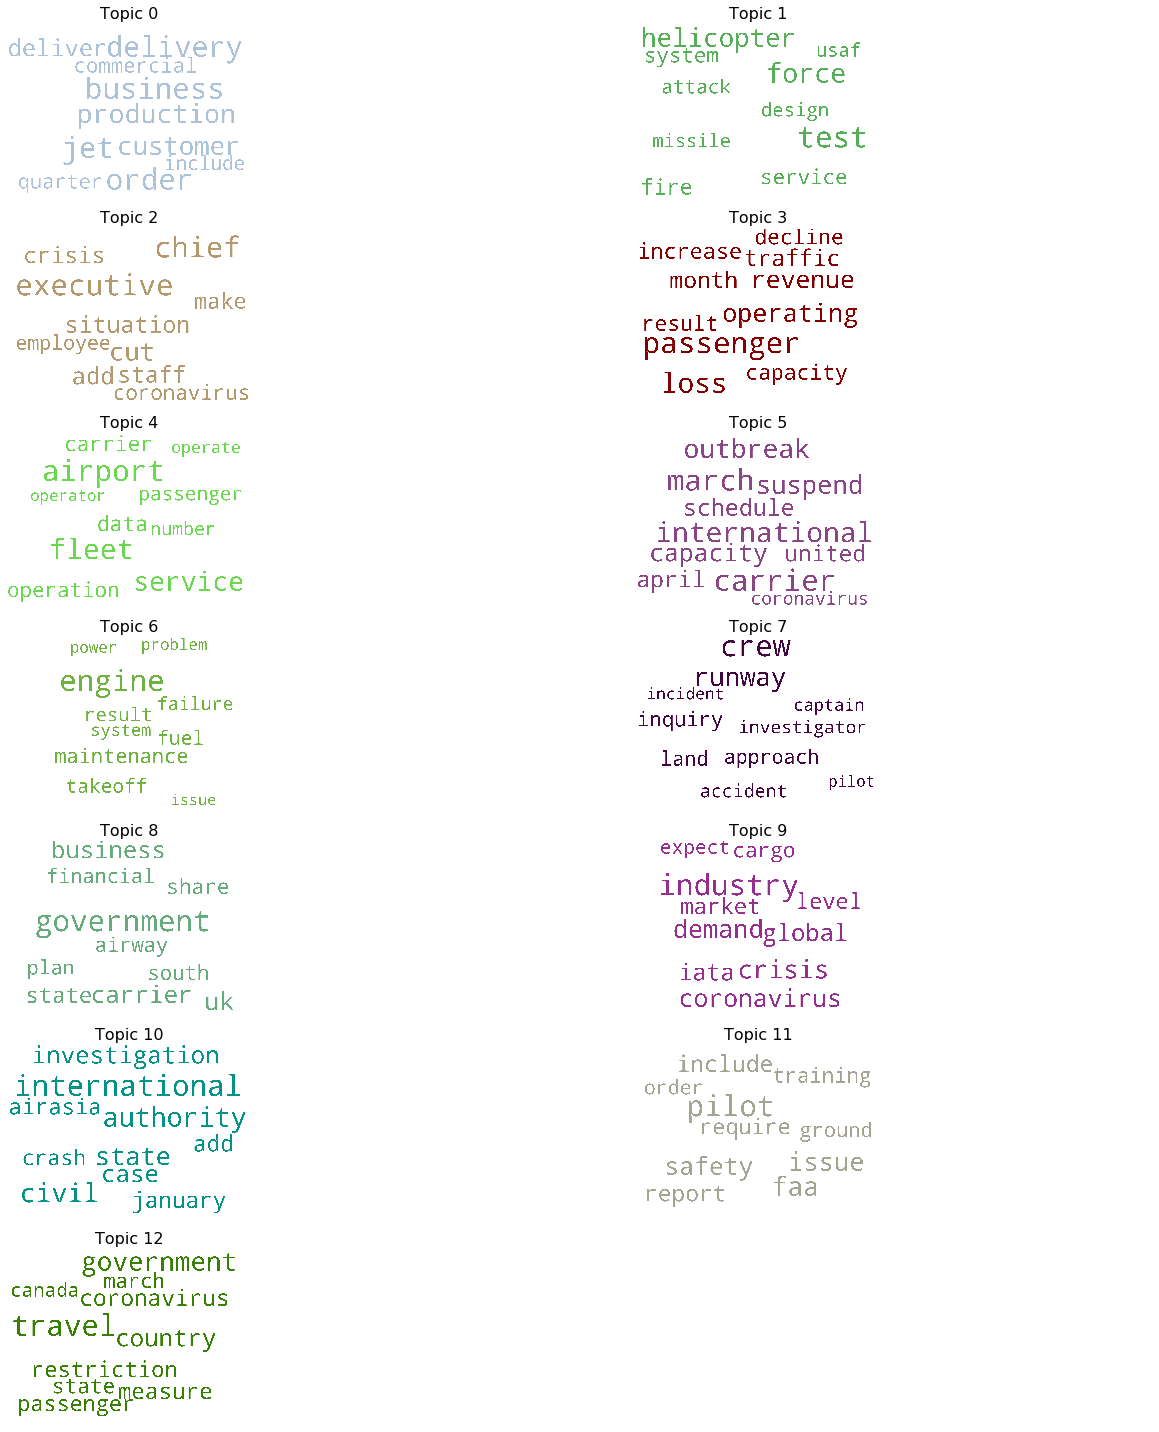

In [25]:
# Word Cloud for top 10 keywords for each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols[7] = '#430541'
cols[10] = '#029386'
cols[3] = '#840000'
cloud = WordCloud(stopwords=stop_list,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab13',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

fig, axes = plt.subplots(7, 2, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    try:
        topics = flightglobal_mallet_neg.show_topic(i)
    except:
        break
    topic_words = dict(topics)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Get most dominant topic for each article and output to csv for Tableau visualization

In [41]:
def format_topics_sentences(ldamodel, corpus, data):
    sent_topics_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

# Selected model
df_topic_sents_keywords_pos = format_topics_sentences(ldamodel=flightglobal_mallet_pos, corpus=article_vecs_pos, data=corpus_pos)
df_topic_sents_keywords_neg = format_topics_sentences(ldamodel=flightglobal_mallet_neg, corpus=article_vecs_neg, data=corpus_neg)

# Format
df_dominant_topic_pos = df_topic_sents_keywords_pos.reset_index()
df_dominant_topic_pos.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic_neg = df_topic_sents_keywords_neg.reset_index()
df_dominant_topic_neg.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

flightglobal_neg_df = flightglobal.loc[flightglobal.sentiment_lexicon=='negative', ['Article','Month']].reset_index(drop=True)
flightglobal_pos_df = flightglobal.loc[flightglobal.sentiment_lexicon=='positive', ['Article','Month']].reset_index(drop=True)

final_pos = flightglobal_pos_df.join(df_dominant_topic_pos)
final_neg = flightglobal_neg_df.join(df_dominant_topic_neg)
final_pos.to_csv('final_pos.csv', index=False)
final_neg.to_csv('final_neg.csv', index=False)
final_pos.head()

,Article,Month,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,TAP Air Portugal has disclosed plans to furthe...,6,0,6.0,0.4615,"expect, cost, demand, end, reduce, month, flee...","[tap, portugal, disclose, plan, far, reduce, f..."
1,"For most of the aviation sector, the coronavir...",6,1,0.0,0.3495,"passenger, coronavirus, travel, airport, cargo...","[sector, coronavirus, pandemic, brought, unpre..."
2,Gulfstream delivered the 200th G280 in late Ju...,6,2,2.0,0.3696,"fleet, order, jet, delivery, customer, service...","[gulfstream, deliver, late, june, mark, presid..."
3,A bilateral effort to equip in-service Eurofig...,6,3,9.0,0.3566,"force, helicopter, system, capability, mission...","[bilateral, effort, equip, inservice, eurofigh..."
4,The first Airbus Defence & Space A330 multi-ro...,6,4,9.0,0.2385,"force, helicopter, system, capability, mission...","[defence, space, multirole, tanker, transport,..."
